In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cnn_simulation_result.csv", index_col=0)
df = df[(df["step_size"] == 0.10) | (df["step_size"]==0.50) | (df["step_size"]==1) | (df["step_size"]==1.50)| (df["step_size"]==2)]
df 

,simulation_name,method_name,step_size,tolerance,total_iteration,simulation_time,computation_time
0,cnn_hole_fill_2,rkacem_system_method,0.1,0.500,13,30.000000,2.622722
2,cnn_hole_fill_2,rkacem_system_method,0.5,0.500,14,30.000000,2.617066
4,cnn_hole_fill_2,rkacem_system_method,1.0,0.500,13,30.000000,2.182025
6,cnn_hole_fill_2,rkacem_system_method,1.5,0.500,12,30.000000,1.880893
8,cnn_hole_fill_2,rkacem_system_method,2.0,0.500,13,30.000000,2.495662
...,...,...,...,...,...,...,...
410,cnn_hole_fill_2,rkhem_system_method,0.1,0.005,260,6.801022,35.872597
412,cnn_hole_fill_2,rkhem_system_method,0.5,0.005,261,7.205384,35.311720
414,cnn_hole_fill_2,rkhem_system_method,1.0,0.005,260,6.858624,35.496836
416,cnn_hole_fill_2,rkhem_system_method,1.5,0.005,261,7.083023,35.931674


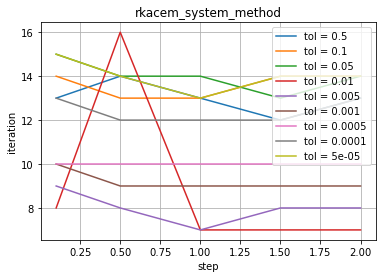

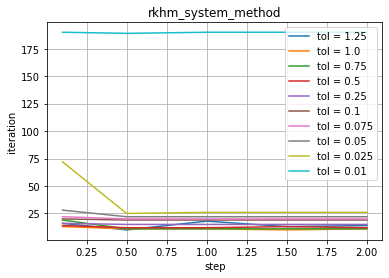

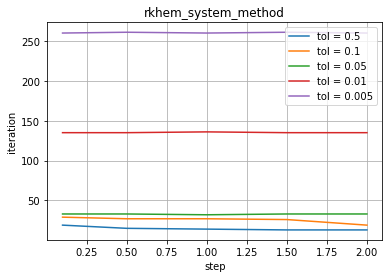

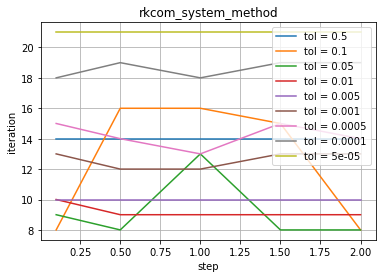

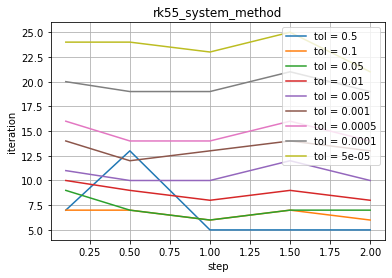

In [3]:
def step_vs_iteration_graph_over_tol(method_name):
    method_df = df[df["method_name"]==method_name]
    for tol in method_df["tolerance"].unique():
        method_step_df = method_df[method_df["tolerance"]==tol]
        steps =  method_step_df["step_size"].values
        iterations = method_step_df["total_iteration"].values
        plt.plot(steps, iterations, label=f"tol = {tol}")

    plt.title(method_name)
    plt.xlabel("step")
    plt.ylabel("iteration")
    plt.legend(loc="upper right")
    plt.grid()
    
step_vs_iteration_graph_over_tol("rkacem_system_method")
plt.show()    
step_vs_iteration_graph_over_tol("rkhm_system_method")
plt.show()    
step_vs_iteration_graph_over_tol("rkhem_system_method")
plt.show()    
step_vs_iteration_graph_over_tol("rkcom_system_method")
plt.show()

step_vs_iteration_graph_over_tol("rk55_system_method")
plt.show() 

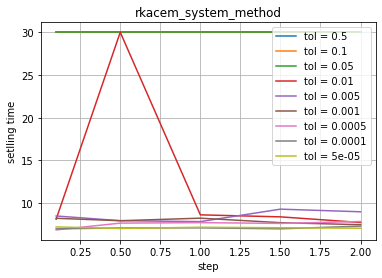

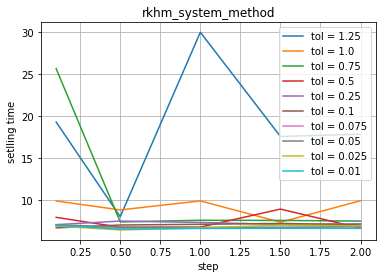

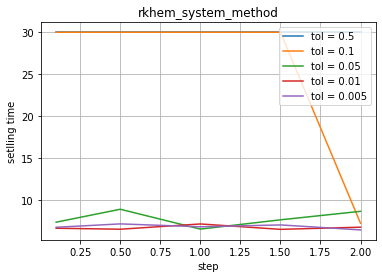

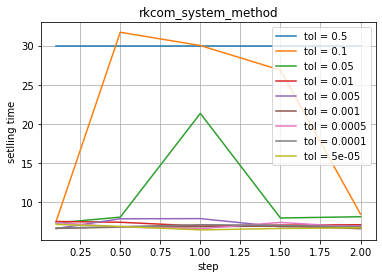

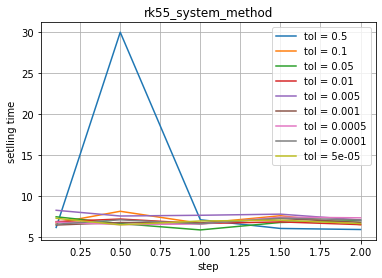

In [4]:
def step_vs_st_graph_over_tol(method_name):
    method_df = df[df["method_name"]==method_name]
    for tol in method_df["tolerance"].unique():
        method_step_df = method_df[method_df["tolerance"]==tol]
        steps =  method_step_df["step_size"].values
        simulation_times = method_step_df["simulation_time"].values
        plt.plot(steps, simulation_times, label=f"tol = {tol}")

    plt.title(method_name)
    plt.xlabel("step")
    plt.ylabel("setlling time")
    plt.legend(loc="upper right")
    plt.grid()
    
step_vs_st_graph_over_tol("rkacem_system_method")
plt.show()    
step_vs_st_graph_over_tol("rkhm_system_method")
plt.show()    
step_vs_st_graph_over_tol("rkhem_system_method")
plt.show()    
step_vs_st_graph_over_tol("rkcom_system_method")
plt.show()

step_vs_st_graph_over_tol("rk55_system_method")
plt.show()

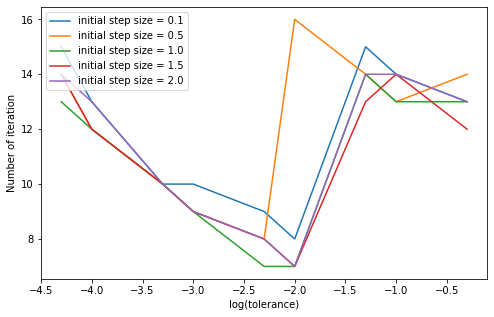

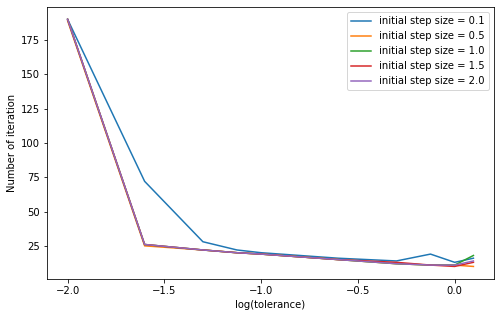

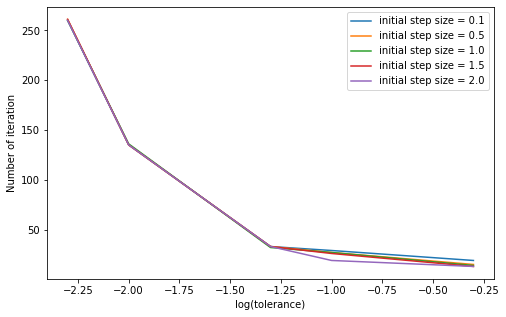

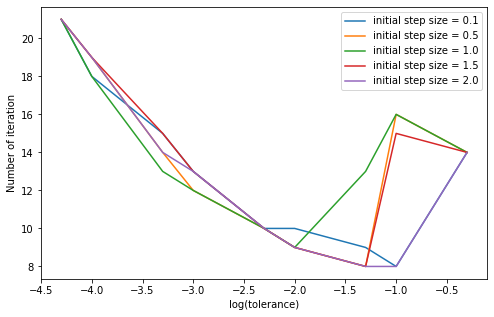

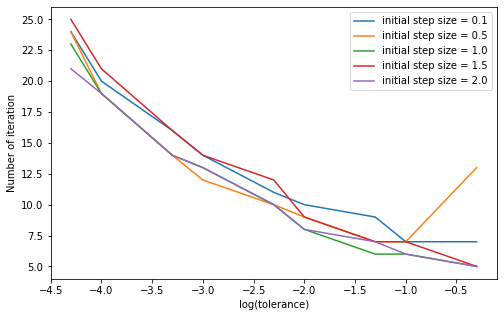

In [5]:
def tol_vs_iteration_graph_over_step_size(method_name):
    method_df = df[df["method_name"]==method_name]
    for step in method_df["step_size"].unique():
        method_step_df = method_df[(method_df["step_size"]==step) & (method_df["simulation_time"] < 40)]
        tols =  method_step_df["tolerance"].values
        ltols = np.log10(tols)
        iterations = method_step_df["total_iteration"].values
        plt.plot(ltols, iterations, label=f"initial step size = {step}")

    # plt.title(method_name)
    plt.xlabel("log(tolerance)")
    plt.ylabel("Number of iteration")
    plt.legend(loc="upper right")
    # plt.grid()


plt.figure(figsize=(8,5))
tol_vs_iteration_graph_over_step_size("rkacem_system_method")
plt.legend(loc="upper left")
plt.savefig('fig/tol vs iteration rkacem.png')
plt.show()


plt.figure(figsize=(8,5))
tol_vs_iteration_graph_over_step_size("rkhm_system_method")
plt.savefig('fig/tol vs iteration rkhm.png')
plt.show()

plt.figure(figsize=(8,5))
tol_vs_iteration_graph_over_step_size("rkhem_system_method")
plt.savefig('fig/tol vs iteration rkhem.png')
plt.show()

plt.figure(figsize=(8,5))
tol_vs_iteration_graph_over_step_size("rkcom_system_method")
plt.savefig('fig/tol vs iteration rkcom.png')
plt.show()

plt.figure(figsize=(8,5))
tol_vs_iteration_graph_over_step_size("rk55_system_method")
plt.savefig('fig/tol vs iteration rk55.png')
plt.show()

In [6]:
np.log10(.05)


-1.3010299956639813

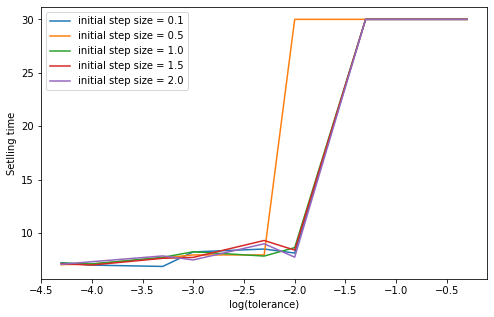

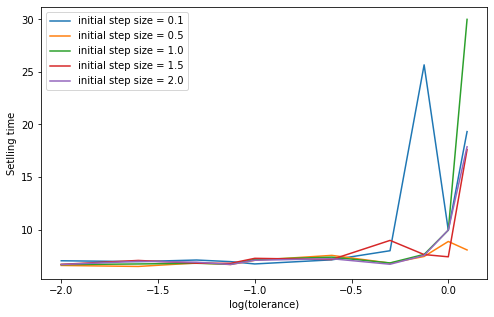

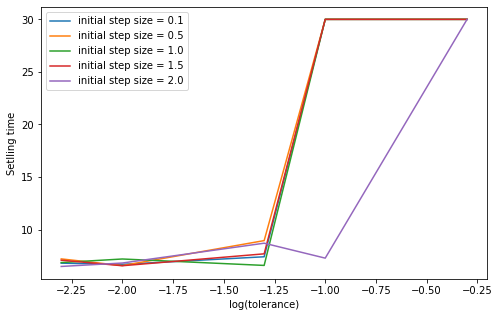

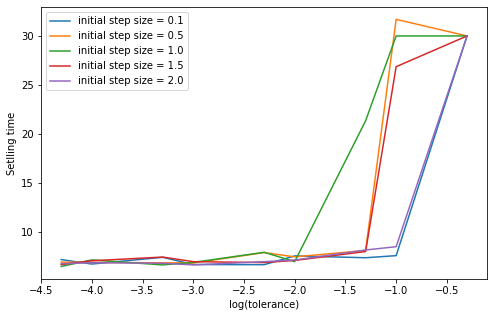

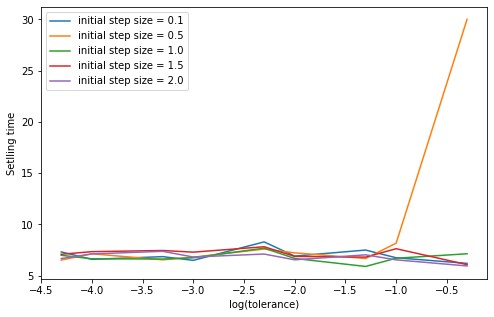

In [7]:
def tol_vs_st_graph_over_step_size(method_name):
    method_df = df[df["method_name"]==method_name]
    for step in method_df["step_size"].unique():
        method_step_df = method_df[method_df["step_size"]==step]
        tols =  method_step_df["tolerance"].values
        ltols = np.log10(tols)
        iterations = method_step_df["simulation_time"].values
        plt.plot(ltols, iterations, label=f"initial step size = {step}")

    # plt.title(method_name)
    plt.xlabel("log(tolerance)")
    plt.ylabel("Setlling time")
    plt.legend(loc="upper left")
    # plt.grid()

plt.figure(figsize=(8,5))
tol_vs_st_graph_over_step_size("rkacem_system_method")
plt.savefig('fig/tol vs setlling time rkacem.png')
plt.show()

plt.figure(figsize=(8,5))
tol_vs_st_graph_over_step_size("rkhm_system_method")
plt.savefig('fig/tol vs setlling time rkhm.png')
plt.show()

plt.figure(figsize=(8,5))
tol_vs_st_graph_over_step_size("rkhem_system_method")
plt.savefig('fig/tol vs setlling time rkhem.png')
plt.show()

plt.figure(figsize=(8,5))
tol_vs_st_graph_over_step_size("rkcom_system_method")
plt.savefig('fig/tol vs setlling time rkcom.png')
plt.show()

plt.figure(figsize=(8,5))
tol_vs_st_graph_over_step_size("rk55_system_method")
plt.savefig('fig/tol vs setlling time rk55.png')
plt.show()

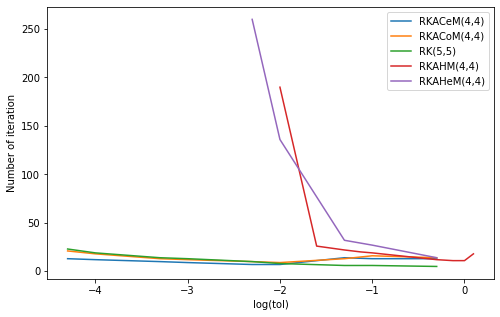

In [11]:
def tol_vs_iteration_over_method():
    step_df = df[df["step_size"]==1]

    for method_name in step_df["method_name"].unique():
        method_step_df = step_df[(step_df["method_name"]==method_name) & (step_df["simulation_time"] < 40)]
        tols =  method_step_df["tolerance"].values
        ltols = np.log10(tols)
        iterations = method_step_df["total_iteration"].values

        if method_name == "rkacem_system_method":
            label_name = "RKACeM(4,4)"
        if method_name == "rkcom_system_method":
            label_name = "RKACoM(4,4)"
        if method_name == "rk55_system_method":
            label_name = "RK(5,5)"
        if method_name == "rkhm_system_method":
            label_name = "RKAHM(4,4)"
        if method_name == "rkhem_system_method":
            label_name = "RKAHeM(4,4)"
            
            
        plt.plot(ltols, iterations, label=f"{label_name}")

    # plt.title(method_name)
    plt.xlabel("log(tol)")
    plt.ylabel("Number of iteration")
    plt.legend(loc="upper right")
    # plt.grid()

plt.figure(figsize=(8,5))
tol_vs_iteration_over_method()
plt.savefig('fig/tol vs iteration all methods.png')
plt.show()

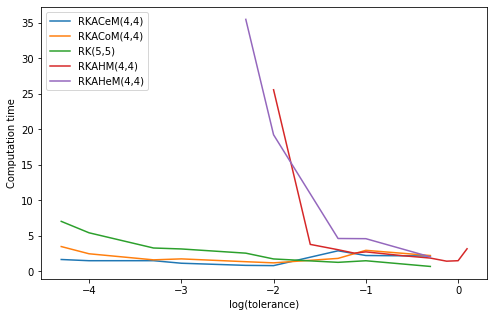

In [14]:
def tol_vs_ct_over_method():
    step_df = df[df["step_size"]==1]
    for method_name in step_df["method_name"].unique():
        method_step_df = step_df[(step_df["method_name"]==method_name) & (step_df["simulation_time"] < 40)]
        tols =  method_step_df["tolerance"].values
        ltols = np.log10(tols)
        computation_times = method_step_df["computation_time"].values
        if method_name == "rkacem_system_method":
            label_name = "RKACeM(4,4)"
        if method_name == "rkcom_system_method":
            label_name = "RKACoM(4,4)"
        if method_name == "rk55_system_method":
            label_name = "RK(5,5)"
        if method_name == "rkhm_system_method":
            label_name = "RKAHM(4,4)"
        if method_name == "rkhem_system_method":
            label_name = "RKAHeM(4,4)"
        plt.plot(ltols, computation_times, label=f"{label_name}")

    # plt.title(method_name)
    plt.xlabel("log(tolerance)")
    plt.ylabel("Computation time")
    plt.legend(loc="upper left")
    # plt.grid()

plt.figure(figsize=(8,5))
tol_vs_ct_over_method()
# plt.ylim([0, 10])
plt.savefig('fig/tol vs computation time all methods.png')
plt.show()